In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Import the train_test_learn module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

files = os.listdir('.')
print(files)

['.config', 'Cleaned_data.csv', 'sample_data']


In [3]:
# Read the CSV file from the current directory into a Pandas DataFrame
data = Path('Cleaned_data.csv')
df = pd.read_csv(data)

# Review the DataFrame (displayed both head and tail to see if 'df' has 'Graduate', 'Enrolled' and 'Dropout')
display(df.head())
display(df.tail())


,Marital status,Course,Daytime/evening attendance,Nationality,Mother qualification,Father qualification,Gender,Scholarship holder,International,Age at enrollment,GDP,Target
0,1,2,1,1,13,10,1,0,0,20,1.74,Dropout
1,1,11,1,1,1,3,1,0,0,19,0.79,Graduate
2,1,5,1,1,22,27,1,0,0,19,1.74,Dropout
3,1,15,1,1,23,27,0,0,0,20,-3.12,Graduate
4,2,3,0,1,22,28,0,0,0,45,0.79,Graduate


,Marital status,Course,Daytime/evening attendance,Nationality,Mother qualification,Father qualification,Gender,Scholarship holder,International,Age at enrollment,GDP,Target
4419,1,15,1,1,1,1,1,0,0,19,-4.06,Graduate
4420,1,15,1,19,1,1,0,0,1,18,2.02,Dropout
4421,1,12,1,1,22,27,0,1,0,30,0.79,Dropout
4422,1,9,1,1,22,27,0,1,0,20,-3.12,Graduate
4423,1,15,1,9,23,27,0,0,1,22,-1.70,Graduate


In [4]:
# Generating descriptive statistics
df.describe()
"""
Need to bin 'Course', 'Mother qualification', 'Father qualification', 'Age at enrollment'
Nationality get the top 5 so we don't have outliers and put the rest as 'others'
"""

"\nNeed to bin 'Course', 'Mother qualification', 'Father qualification', 'Age at enrollment'\nNationality get the top 5 so we don't have outliers and put the rest as 'others'\n"

In [5]:
# Checking the data types for each features
df.dtypes

Marital status                  int64
Course                          int64
Daytime/evening attendance      int64
Nationality                     int64
Mother qualification            int64
Father qualification            int64
Gender                          int64
Scholarship holder              int64
International                   int64
Age at enrollment               int64
GDP                           float64
Target                         object
dtype: object

In [6]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Marital status              4424 non-null   int64  
 1   Course                      4424 non-null   int64  
 2   Daytime/evening attendance  4424 non-null   int64  
 3   Nationality                 4424 non-null   int64  
 4   Mother qualification        4424 non-null   int64  
 5   Father qualification        4424 non-null   int64  
 6   Gender                      4424 non-null   int64  
 7   Scholarship holder          4424 non-null   int64  
 8   International               4424 non-null   int64  
 9   Age at enrollment           4424 non-null   int64  
 10  GDP                         4424 non-null   float64
 11  Target                      4424 non-null   object 
dtypes: float64(1), int64(10), object(1)
memory usage: 414.9+ KB


In [7]:
# Determine the number of unique values in each column.
df.nunique()

Marital status                 6
Course                        17
Daytime/evening attendance     2
Nationality                   21
Mother qualification          29
Father qualification          34
Gender                         2
Scholarship holder             2
International                  2
Age at enrollment             46
GDP                           10
Target                         3
dtype: int64

In [8]:
# Check the category for 'Targets'
type_counts = df['Target'].value_counts()
type_counts

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [9]:
# Convert 'Graduate' to 2, 'Enrolled' to 1 and 'Dropout' to 0
df['Target'] = df['Target'].map({'Graduate': 2, 'Enrolled': 1, 'Dropout': 0})
df.head()

,Marital status,Course,Daytime/evening attendance,Nationality,Mother qualification,Father qualification,Gender,Scholarship holder,International,Age at enrollment,GDP,Target
0,1,2,1,1,13,10,1,0,0,20,1.74,0
1,1,11,1,1,1,3,1,0,0,19,0.79,2
2,1,5,1,1,22,27,1,0,0,19,1.74,0
3,1,15,1,1,23,27,0,0,0,20,-3.12,2
4,2,3,0,1,22,28,0,0,0,45,0.79,2


In [10]:
# Checking the data types for 'Target'
df.dtypes

Marital status                  int64
Course                          int64
Daytime/evening attendance      int64
Nationality                     int64
Mother qualification            int64
Father qualification            int64
Gender                          int64
Scholarship holder              int64
International                   int64
Age at enrollment               int64
GDP                           float64
Target                          int64
dtype: object

**Data Exploration**

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>],
       [<Axes: title={'center': 'Nationality'}>,
        <Axes: title={'center': 'Mother qualification'}>,
        <Axes: title={'center': 'Father qualification'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Scholarship holder'}>,
        <Axes: title={'center': 'International'}>],
       [<Axes: title={'center': 'Age at enrollment'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

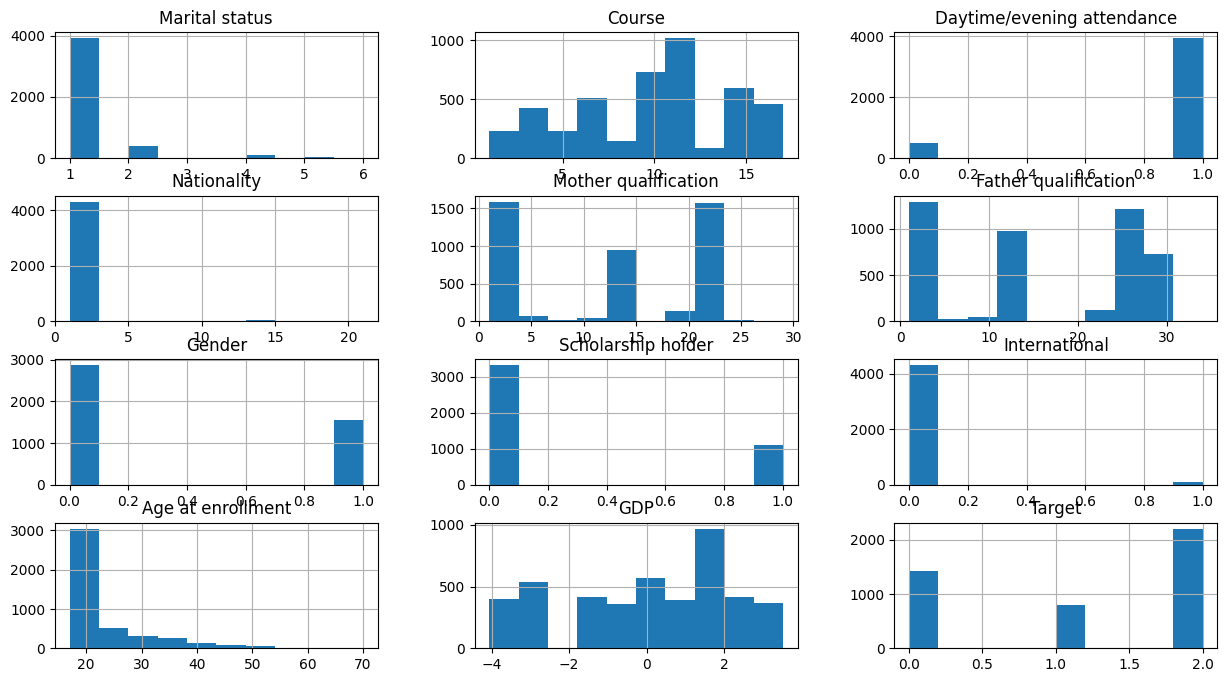

In [12]:
df.hist(figsize = (15,8))

In [13]:
df.corr()


,Marital status,Course,Daytime/evening attendance,Nationality,Mother qualification,Father qualification,Gender,Scholarship holder,International,Age at enrollment,GDP,Target
Marital status,1.000000,0.018925,-0.274939,-0.020722,0.185522,0.128326,-0.014738,-0.053765,-0.027905,0.522717,-0.027003,-0.089804
Course,0.018925,1.000000,-0.070232,-0.004761,0.058909,0.045659,-0.111383,0.051668,-0.004662,-0.036929,-0.012518,0.007841
Daytime/evening attendance,-0.274939,-0.070232,1.000000,0.024433,-0.195346,-0.137769,-0.012326,0.093912,0.027973,-0.462280,0.022929,0.075107
Nationality,-0.020722,-0.004761,0.024433,1.000000,-0.043847,-0.088892,-0.025462,-0.018468,0.911724,-0.008241,0.044563,-0.004740
Mother qualification,0.185522,0.058909,-0.195346,-0.043847,1.000000,0.524529,-0.062374,0.048225,-0.038672,0.279921,-0.079664,-0.038346
Father qualification,0.128326,0.045659,-0.137769,-0.088892,0.524529,1.000000,-0.073614,0.107134,-0.086503,0.190410,-0.070200,0.000329
Gender,-0.014738,-0.111383,-0.012326,-0.025462,-0.062374,-0.073614,1.000000,-0.169302,-0.026415,0.148835,-0.008108,-0.229270
Scholarship holder,-0.053765,0.051668,0.093912,-0.018468,0.048225,0.107134,-0.169302,1.000000,-0.027972,-0.189917,0.035650,0.297595
International,-0.027905,-0.004662,0.027973,0.911724,-0.038672,-0.086503,-0.026415,-0.027972,1.000000,-0.007111,0.044389,0.003934
Age at enrollment,0.522717,-0.036929,-0.462280,-0.008241,0.279921,0.190410,0.148835,-0.189917,-0.007111,1.000000,-0.064678,-0.243438


<Axes: >

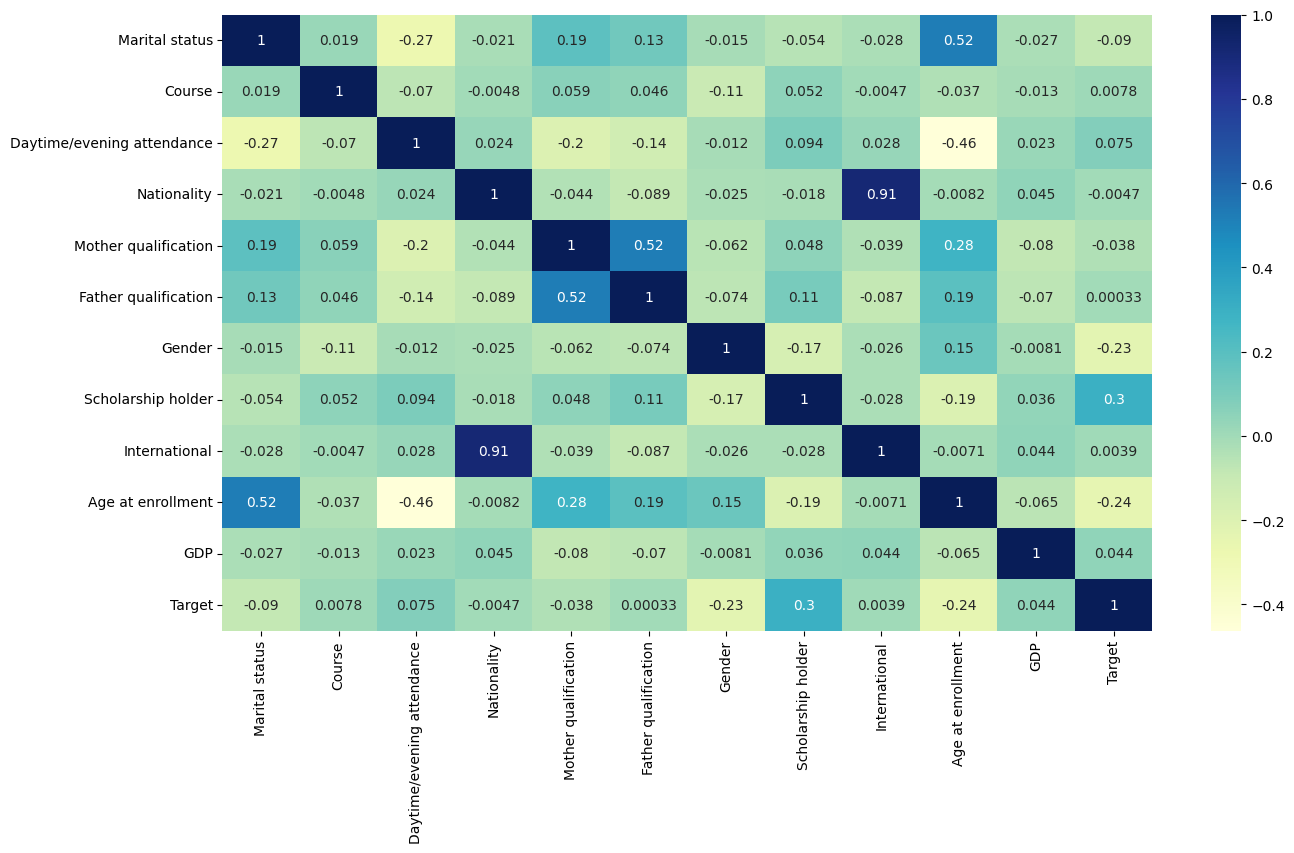

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [15]:
# Select the categorical columns for one-hot encoding, this is to make sure that the machine learning algorithm sees these values as categorical values rather than numerical values.
categorical_cols = ['Marital status', 'Course', 'Daytime/evening attendance', 'Nationality',
                    'Mother qualification', 'Father qualification', 'Gender',
                    'Scholarship holder', 'International']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the encoded DataFrame
df_encoded.head()

,Age at enrollment,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Course_1,...,Father qualification_31,Father qualification_32,Father qualification_33,Father qualification_34,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,20,1.74,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,19,0.79,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,19,1.74,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,20,-3.12,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,45,0.79,2,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


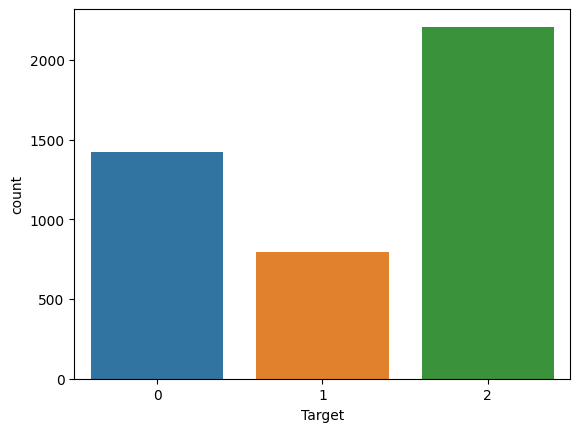

In [16]:
# Visualize the data
sns.countplot(x ='Target', data=df)
plt.show()

In [17]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_encoded['Target']

# Separate the X variable, the features
X = df_encoded.drop(columns=['Target'])

In [18]:
# Review the y variable Series
y[:5]

0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

In [19]:
# Review the X variable DataFrame
X.head()

,Age at enrollment,GDP,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Course_1,Course_2,...,Father qualification_31,Father qualification_32,Father qualification_33,Father qualification_34,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,20,1.74,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
1,19,0.79,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,19,1.74,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,20,-3.12,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,45,0.79,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [20]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
# Add 'stratify=y' so we have an even distribution of 1's and 0's within our model, so we have a representation of all of our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=.2,
                                                    random_state=1,
                                                    )

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.3 MB/s eta 0:00:00


In [23]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model4 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid','elu','selu','softmax'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model4.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=117))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model4.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model4.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])


    return nn_model4

In [24]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

In [25]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 508 Complete [00h 00m 42s]
val_accuracy: 0.17966102063655853

Best val_accuracy So Far: 0.3209039568901062
Total elapsed time: 01h 00m 16s


In [26]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 1,
 'num_layers': 6,
 'units_0': 5,
 'units_1': 7,
 'units_2': 9,
 'units_3': 9,
 'units_4': 3,
 'units_5': 7,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

In [27]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

28/28 - 0s - loss: 1.0102 - accuracy: 0.3209 - 494ms/epoch - 18ms/step
Loss: 1.0101925134658813, Accuracy: 0.3209039568901062
